### 다항 회귀
- 직선으로 많은 데이터를 만족할 수 없는 선형 회귀의 경우 사용
- 기존 피쳐를 조합해서 항을 늘려주는 작업 진행 ==> 전처리에서 진행

In [12]:
### 모듈 로딩
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict,cross_val_score
%matplotlib inline

In [13]:
# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 변환
def true_fun(X):
    return np.cos(1.5*np.pi*X)

In [14]:
# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

In [15]:
# y값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값
y = true_fun(X) + np.random.randn(n_samples) *0.1

In [16]:
plt.figure(figsize=(14,5))
degrees = [1,4,15]

<Figure size 1400x500 with 0 Axes>


Degree 1 회귀 계수는 [-1.61] 입니다
Degree 1 MSE는 0.40772896250986845 입니다

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다
Degree 4 MSE는 0.043208749872317626 입니다

Degree 15 회귀 계수는 [-2.98292000e+03  1.03899180e+05 -1.87415809e+06  2.03715961e+07
 -1.44873157e+08  7.09315008e+08 -2.47065753e+09  6.24561150e+09
 -1.15676562e+10  1.56895047e+10 -1.54006170e+10  1.06457389e+10
 -4.91378211e+09  1.35919860e+09 -1.70381087e+08] 입니다
Degree 15 MSE는 182493841.77304456 입니다


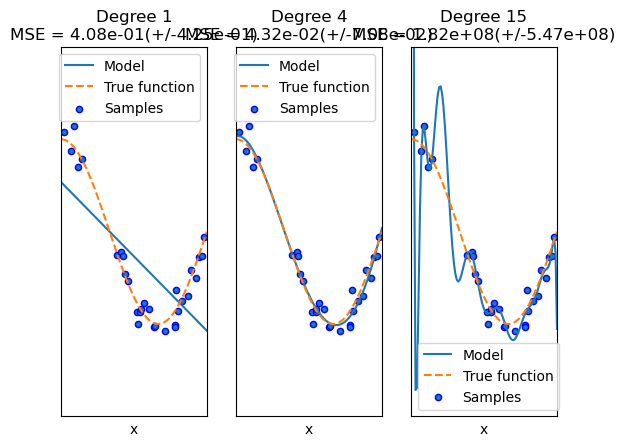

In [19]:
# 다항 회귀의 차수(degree)를 1,4,15로 각각 변화시키면서 비교
for i in range(len(degrees)):
    ax= plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree별로 Polynomial 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([('polynomial_features',polynomial_features),
                         ('linear_regression', linear_regression)])
    pipeline.fit(X.reshape(-1,1),y)
    
    # 교차 검증으로 다항 회귀를 평가
    scores= cross_val_score(pipeline, X.reshape(-1,1), y, scoring="neg_mean_squared_error", cv=10)
    
    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀분석 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE는 {1} 입니다'.format(degrees[i], -1*np.mean(scores)))

    # 0부터 1까지 테스트 데이터 세트를 100개 나누어 예측 수행
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
    X_test = np.linspace(0,1,100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label = 'Model')
    # 실제값 곡선
    plt.plot(X_test, true_fun(X_test),'--', label = 'True function')
    plt.scatter(X,y, edgecolors='b', s=20, label = 'Samples')

    plt.xlabel('x'); plt.ylabel; plt.xlim((0,1)); plt.ylim((-2,2)); plt.legend(loc='best')
    plt.title('Degree {}\nMSE = {:.2e}(+/-{:.2e})'.format(degrees[i], -scores.mean(), scores.std()))

plt.show()
    